In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# library to check if data is time-stationary
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [119]:
df=pd.read_excel('150projectDATA.xlsx')
df

,Year,Return,Annual Yield,Unemployment rate,Inflation Rate
0,1970,0.0822,0.0717,0.049833,0.0584
1,1971,0.0424,0.0467,0.059500,0.0429
2,1972,0.0298,0.0444,0.056000,0.0327
3,1973,0.0342,0.0874,0.048583,0.0618
4,1974,0.1007,0.1051,0.056417,0.1105
5,1975,0.0677,0.0582,0.084750,0.0914
6,1976,0.0818,0.0505,0.077000,0.0574
7,1977,0.1465,0.0554,0.070500,0.0650
8,1978,0.1572,0.0794,0.060667,0.0763
9,1979,0.1374,0.1120,0.058500,0.1125


In [120]:
test_result=adfuller(df['Annual Yield'])

In [121]:
test_result

(-2.8893177190257973,
 0.04660437764001481,
 11,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 -252.32499002930416)

In [122]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [123]:
adfuller_test(df['Annual Yield'])

ADF Test Statistic : -2.8893177190257973
p-value : 0.04660437764001481
#Lags Used : 11
Number of Observations : 41
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [124]:
adfuller_test(df['Unemployment rate'])

ADF Test Statistic : -3.3655261237272645
p-value : 0.012191747801981264
#Lags Used : 1
Number of Observations : 51
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [125]:
adfuller_test(df['Inflation Rate'])

ADF Test Statistic : -2.885068596773514
p-value : 0.04711207162451932
#Lags Used : 1
Number of Observations : 51
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [126]:
df.iloc[:,1:].shape[0]*0.6

31.799999999999997

In [127]:
# splitting the data into training (60%) and testing (40%)
train_data = df.iloc[:32,1]
test_data = df.iloc[33:,1]

In [150]:
# fitting the ARIMA Model to our data
# order = (p,d,q)
# p = lag of order
# d = degree of difference
# q = size of moving average window

# model=ARIMA(df['Inflation Rate'],order=(1,1,1))
# model_fit=model.fit()

# model2=ARIMA(df['Unemployment rate'],order=(1,1,1))
# model_fit_2=model2.fit()

# model3=ARIMA(df['Annual Yield'],order=(1,1,1))
# model_fit_3=model3.fit()

model4=ARIMA(train_data,order=(5,1,1))
model_fit_4=model4.fit()

/Users/cristianespinosa/opt/anaconda3/envs/tensor/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [151]:
model_fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Return   No. Observations:                   32
Model:                 ARIMA(5, 1, 1)   Log Likelihood                  68.255
Date:                Wed, 03 May 2023   AIC                           -122.509
Time:                        13:38:28   BIC                           -112.471
Sample:                             0   HQIC                          -119.237
                                 - 32                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6729      0.496      1.356      0.175      -0.300       1.646
ar.L2         -0.0992      0.338     -0.294      0.769      -0.761       0.563
ar.L3         -0.2055      0.195     -1.054      0.292      -0.588       0.177
ar.L4         -0.0575      0.319     -0.180      0.857      -0.684       0.569
ar.L5         -0.1311      0.396     -0.331      0.741      -0.908       0.646
ma.L1         -0.7128      0.454     -1.571      0.116      -1.602       0.177
sigma2         0.0007      0.000      2.760      0.006       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.67
Prob(Q):                              0.88   Prob(JB):                         0.43
Heteroskedasticity (H):               0.21   Skew:                             0.53
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [152]:
df.iloc[0,:32]

Year                 1970.000000
Return                  0.082200
Annual Yield            0.071700
Unemployment rate       0.049833
Inflation Rate          0.058400
Name: 0, dtype: float64

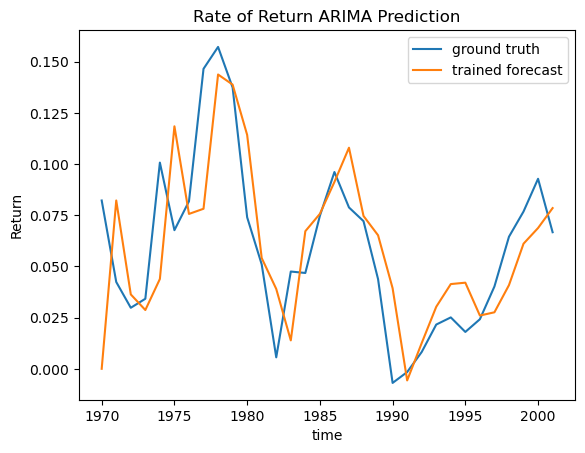

In [153]:
# # plotting inflation rate
# preds = model_fit.predict()
# plt.plot(df['Year'],df['Inflation Rate'])
# plt.plot(df['Year'],preds)
# plt.legend(['ground truth','forecast'])
# plt.xlabel('time')
# plt.ylabel('Inflation Rate')
# plt.title('Inflation Rate ARIMA Prediction')
# plt.show()

# # plotting unemployment rate
# preds2 = model_fit_2.predict()
# plt.plot(df['Year'],df['Unemployment rate'])
# plt.plot(df['Year'],preds2)
# plt.legend(['ground truth','forecast'])
# plt.xlabel('time')
# plt.ylabel('Unemployment Rate')
# plt.title('Unemployment Rate ARIMA Prediction')
# plt.show()

# # plotting annual yield
# preds3 = model_fit_3.predict()
# plt.plot(df['Year'],df['Annual Yield'])
# plt.plot(df['Year'],preds3)
# plt.legend(['ground truth','forecast'])
# plt.xlabel('time')
# plt.ylabel('Annual Yield')
# plt.title('Annual Yield ARIMA Prediction')
# plt.show()

# plotting rate of return
train_preds = model_fit_4.predict()
plt.plot(df.iloc[:32,0],df.iloc[:32,1])
plt.plot(df.iloc[:32,0],train_preds)
plt.legend(['ground truth','trained forecast'])
plt.xlabel('time')
plt.ylabel('Return')
plt.title('Rate of Return ARIMA Prediction')
plt.show()

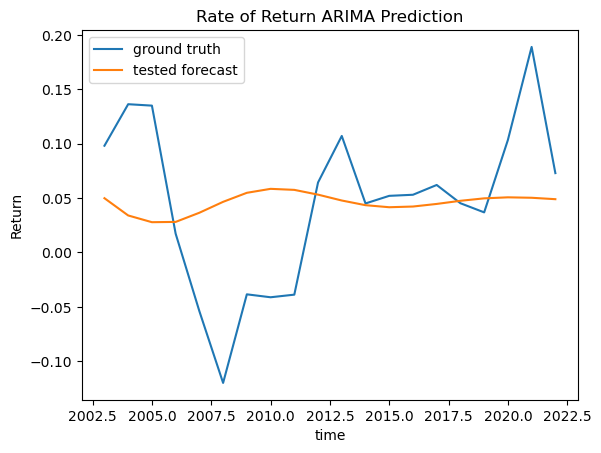

In [154]:
forecast = model_fit_4.forecast(len(test_data))
plt.plot(df.iloc[33:,0],test_data)
plt.plot(df.iloc[33:,0],forecast)
plt.legend(['ground truth','tested forecast'])
plt.xlabel('time')
plt.ylabel('Return')
plt.title('Rate of Return ARIMA Prediction')
plt.show()

In [176]:
# computing the test mse
s = 0
for i in range(len(test_data)):
    print(i+33)
    s += (test_data[i+33] - forecast[i+32])**2
mse = s/len(test_data)
print(mse)

mse = np.mean((test_data - forecast)**2)
print(mse)

33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
0.005765482940493583
0.00649695193969896


In [174]:
forecast

32    0.049929
33    0.034052
34    0.027862
35    0.028120
36    0.036555
37    0.046589
38    0.054889
39    0.058542
40    0.057597
41    0.053210
42    0.047810
43    0.043506
44    0.041623
45    0.042268
46    0.044659
47    0.047546
48    0.049791
49    0.050735
50    0.050331
51    0.049026
Name: predicted_mean, dtype: float64

In [149]:
len(test_data)

20

In [135]:
len(forecast)

20

In [136]:
len(df.iloc[33:])

20